## Library Importation and Data Importation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
# from google.colab import files
# files.upload()

In [3]:
df = pd.read_csv("dataset_phishing.csv")


# Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [5]:
df=df.dropna()
df

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


In [6]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [7]:
df=df.drop_duplicates()

In [8]:
df

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


In [9]:
data=df

In [10]:
df=df.dropna()
df

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [12]:
df.status

0        legitimate
1          phishing
2          phishing
3        legitimate
4        legitimate
            ...    
11425    legitimate
11426      phishing
11427    legitimate
11428    legitimate
11429      phishing
Name: status, Length: 11430, dtype: object

In [13]:
df.status.value_counts()

legitimate    5715
phishing      5715
Name: status, dtype: int64

# Data Visualisation

<AxesSubplot:xlabel='status', ylabel='count'>

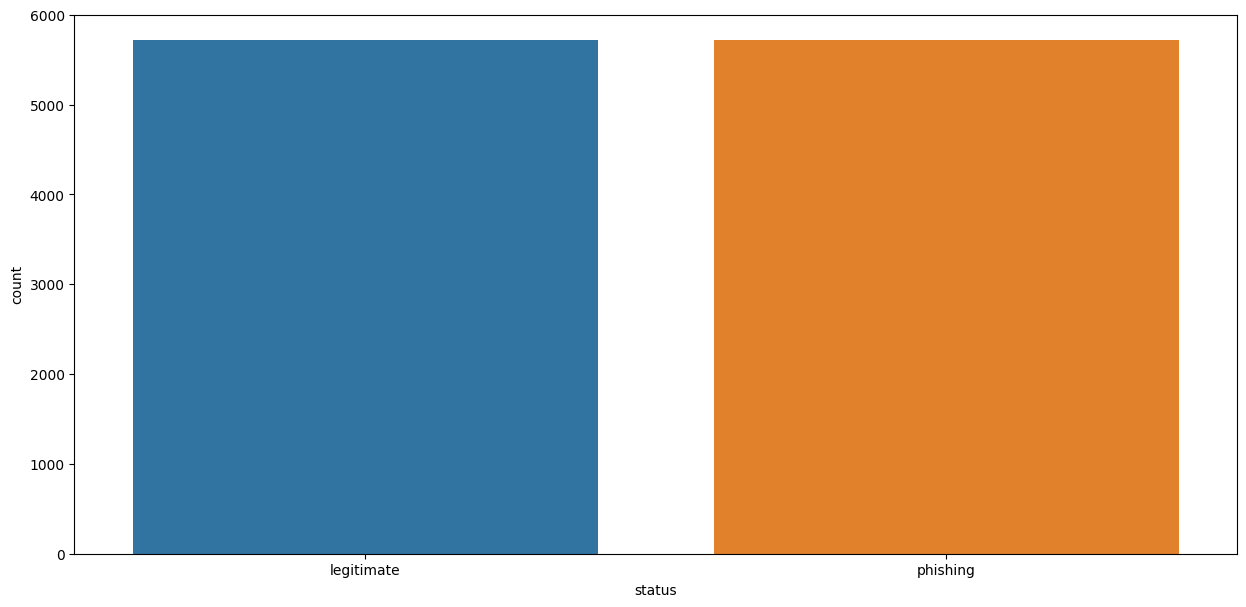

In [14]:
plt.figure(figsize=(15,7))
sns.countplot(x = "status", data = df)

# Label Encoding

In [15]:
obj_columns=['status']
le=LabelEncoder()
for x in obj_columns:
    df[x]=le.fit_transform(df[x])
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,1
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


<AxesSubplot:xlabel='google_index', ylabel='count'>

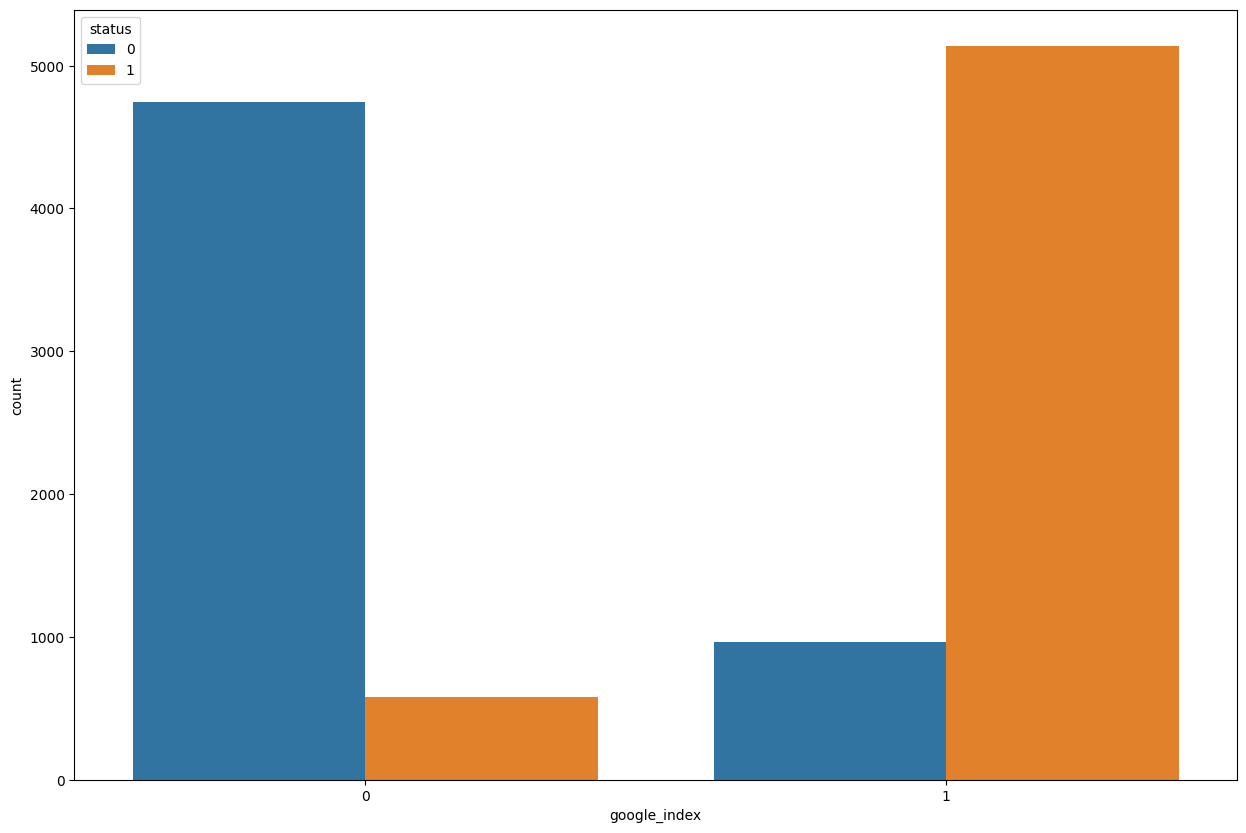

In [16]:
plt.figure(figsize = (15, 10))
sns.countplot(x='google_index',hue='status', data=df)

<AxesSubplot:xlabel='ip', ylabel='count'>

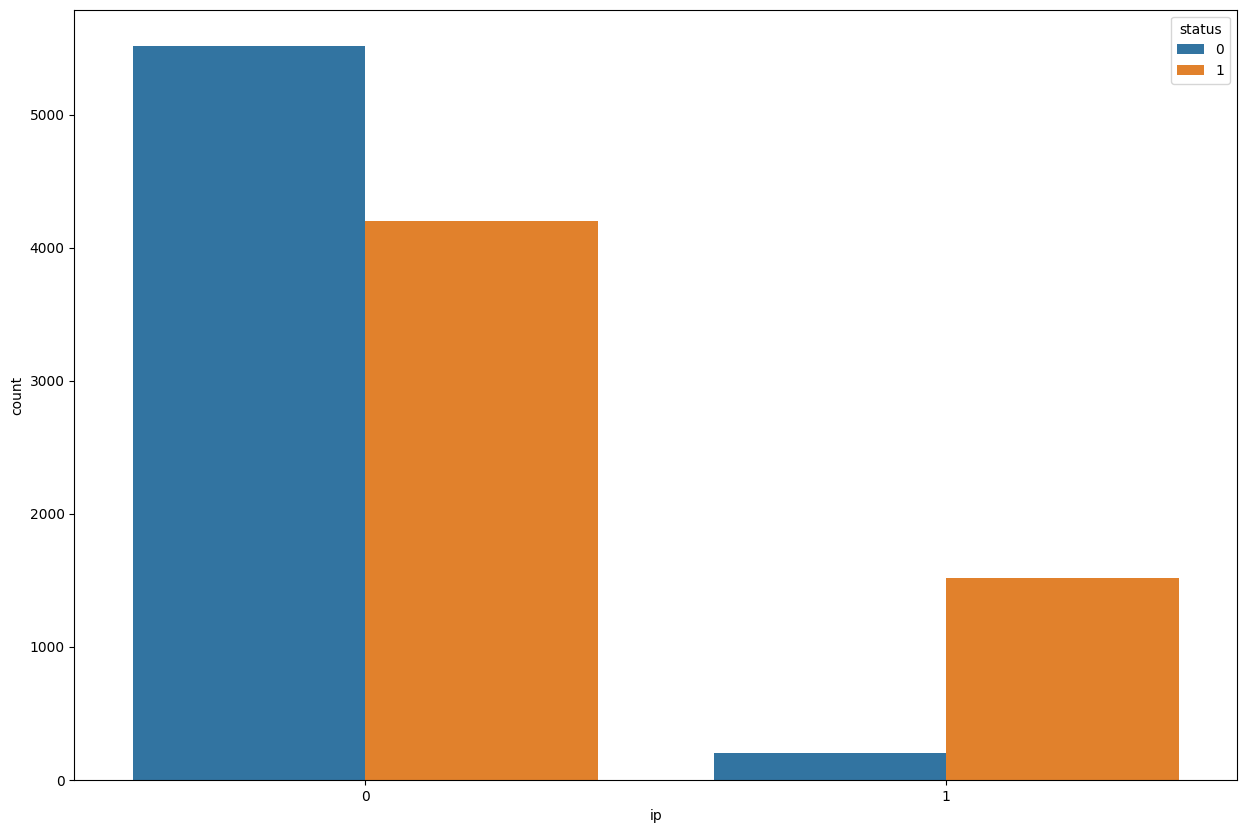

In [17]:
plt.figure(figsize = (15, 10))
sns.countplot(x='ip',hue='status', data=df)

<AxesSubplot:ylabel='length_url'>

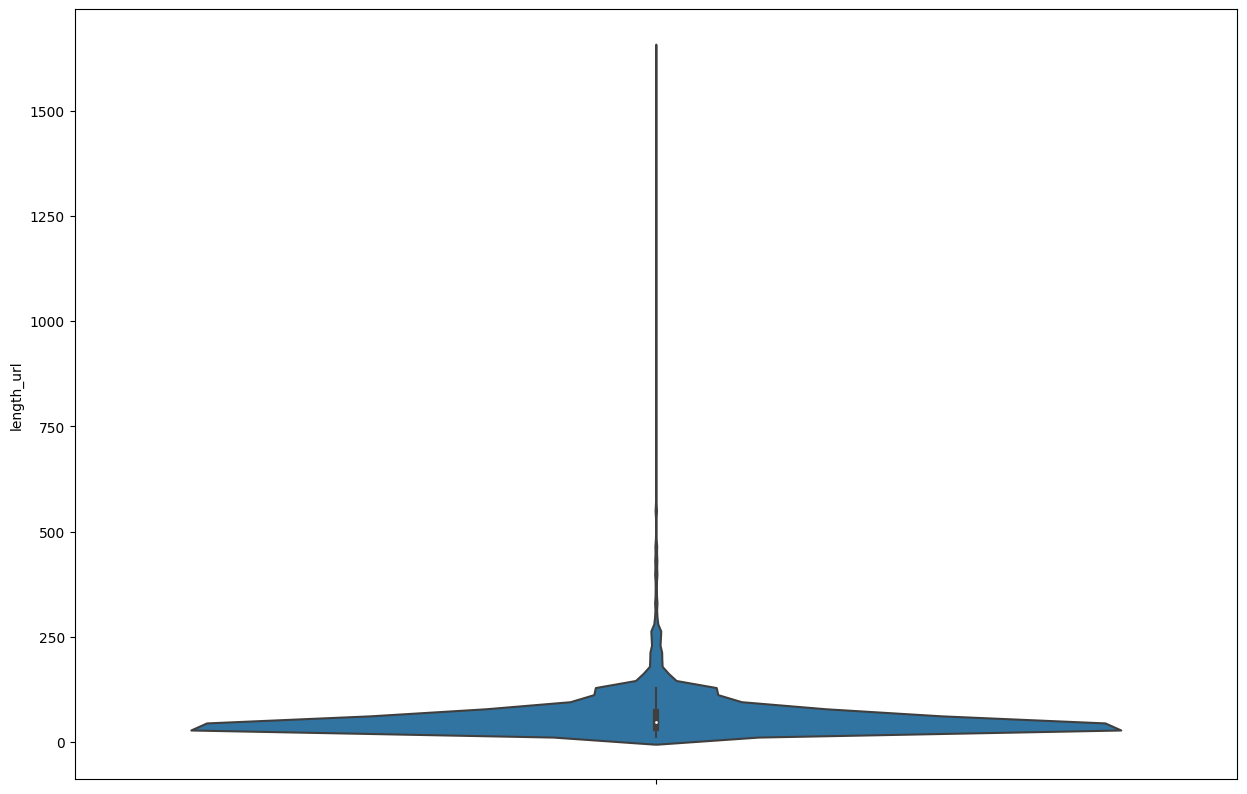

In [18]:
plt.figure(figsize = (15, 10))
sns.violinplot(y='length_url',hue='status', data=df)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

## Data Splitting 1

In [20]:
x = df.drop('status', axis=1)
x=x.iloc[:,1:]
y = df['status']

In [21]:
x

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,37,19,0,3,0,0,0,0,0,0,...,0,0,1,0,45,-1,0,1,1,4
1,77,23,1,1,0,0,0,0,0,0,...,0,1,0,0,77,5767,0,0,1,2
2,126,50,1,4,1,0,1,2,0,3,...,0,1,0,0,14,4004,5828815,0,1,0
3,18,11,0,2,0,0,0,0,0,0,...,0,1,0,0,62,-1,107721,0,0,3
4,55,15,0,2,2,0,0,0,0,0,...,0,0,1,0,224,8175,8725,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,45,17,0,2,0,0,0,0,0,0,...,0,0,0,0,448,5396,3980,0,0,6
11426,84,18,0,5,0,1,1,0,0,1,...,0,1,0,0,211,6728,0,0,1,0
11427,105,16,1,2,6,0,1,0,0,1,...,0,0,0,0,2809,8515,8,0,1,10
11428,38,30,0,2,0,0,0,0,0,0,...,0,1,0,0,85,2836,2455493,0,0,4


In [22]:
y

0        0
1        1
2        1
3        0
4        0
        ..
11425    0
11426    1
11427    0
11428    0
11429    1
Name: status, Length: 11430, dtype: int32

# Feature Scaling

In [23]:
sc=StandardScaler()
x = sc.fit_transform(x)

# Data Splitting 2

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# ******** MODEL DEVELOPMENT **********

Decision Tree Model

In [25]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)
print(classification_report(dt_pred, y_test))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1120
           1       0.94      0.93      0.94      1166

    accuracy                           0.94      2286
   macro avg       0.94      0.94      0.94      2286
weighted avg       0.94      0.94      0.94      2286



Random Forest Model

In [26]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
print(classification_report(rf_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1132
           1       0.96      0.96      0.96      1154

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286



In [27]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [28]:
dt_precision=precision_score(y_test,dt_pred)
dt_recall=recall_score(y_test,dt_pred)
dt_accuracy=accuracy_score(y_test,dt_pred)
dt_f1=f1_score(y_test,dt_pred)
print('Overall Precision (DT):',dt_precision)
print('Overall Recall (DT):',dt_recall)
print('Overall Accuracy (DT):',dt_accuracy)
print('Overall F1-score (DT):',dt_f1)

Overall Precision (DT): 0.9313893653516295
Overall Recall (DT): 0.9427083333333334
Overall Accuracy (DT): 0.9361329833770778
Overall F1-score (DT): 0.9370146678170836


In [29]:
rf_precision=precision_score(y_test,rf_pred)
rf_recall=recall_score(y_test,rf_pred)
rf_accuracy=accuracy_score(y_test,rf_pred)
rf_f1=f1_score(y_test,rf_pred)
print('Overall Precision (RF):',rf_precision)
print('Overall Recall (RF):',rf_recall)
print('Overall Accuracy (RF):',rf_accuracy)
print('Overall F1-score (RF):',rf_f1)

Overall Precision (RF): 0.9610051993067591
Overall Recall (RF): 0.9626736111111112
Overall Accuracy (RF): 0.9615048118985127
Overall F1-score (RF): 0.9618386816999132


In [30]:
precisions=[dt_precision, rf_precision]
recalls=[dt_recall, rf_recall]
accuracys=[dt_accuracy, rf_accuracy]
f1s=[dt_f1, rf_f1]
models=['Decision Tree','Random Forest']

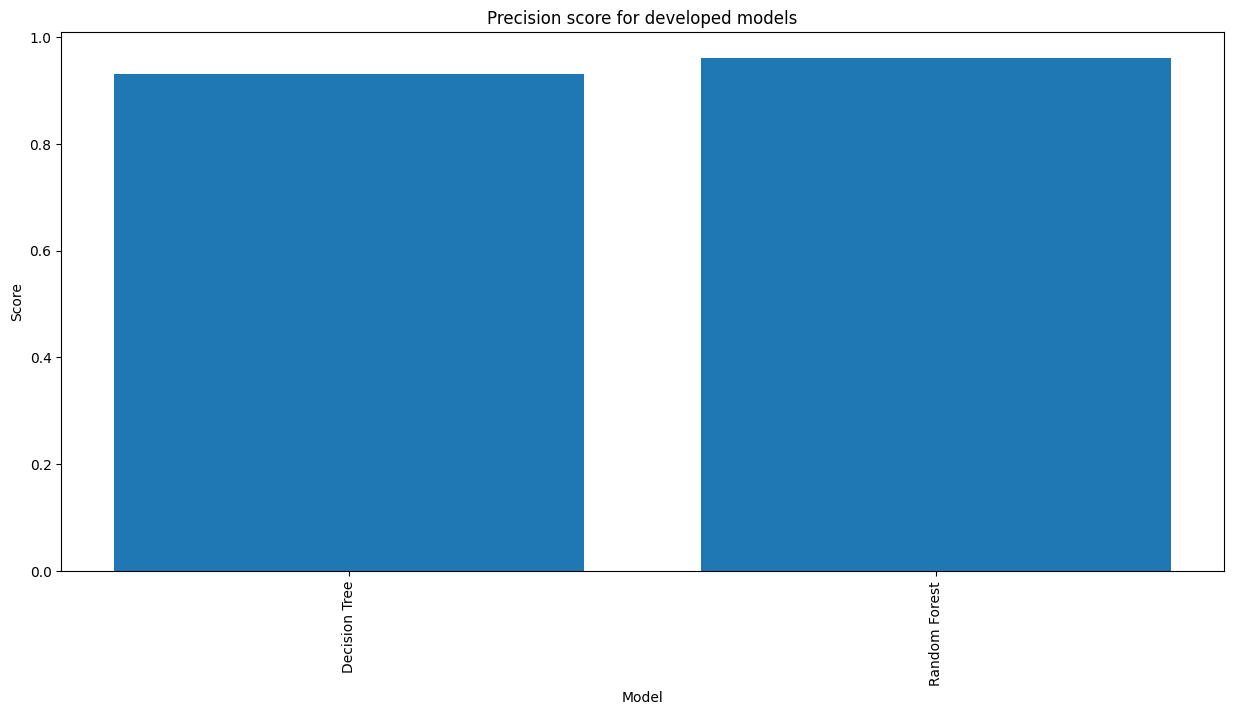

In [31]:
plt.figure(figsize=(15,7))
plt.title('Precision score for developed models')
plt.bar(models, precisions,label='Precision')
plt.xticks(rotation=90)
plt.ylabel('Score')
plt.xlabel('Model')
plt.show()

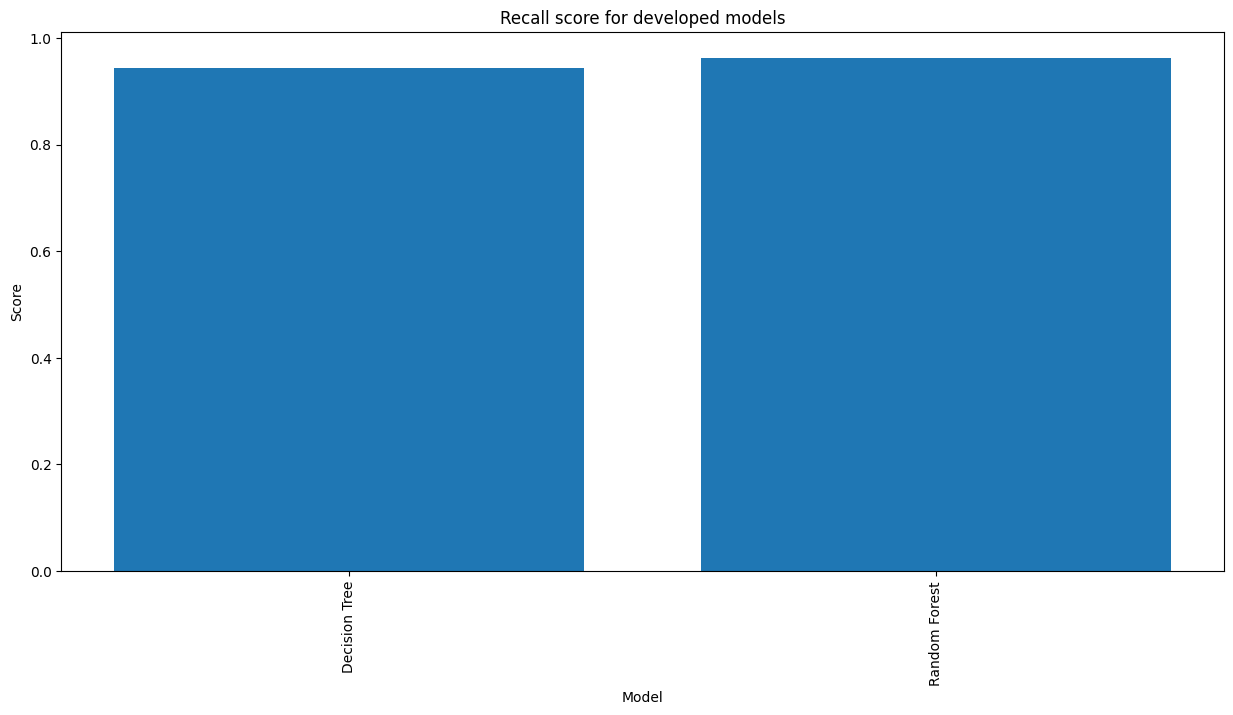

In [32]:
plt.figure(figsize=(15,7))
plt.title('Recall score for developed models')
plt.bar(models, recalls,label='recall')
plt.xticks(rotation=90)
plt.ylabel('Score')
plt.xlabel('Model')
plt.show()

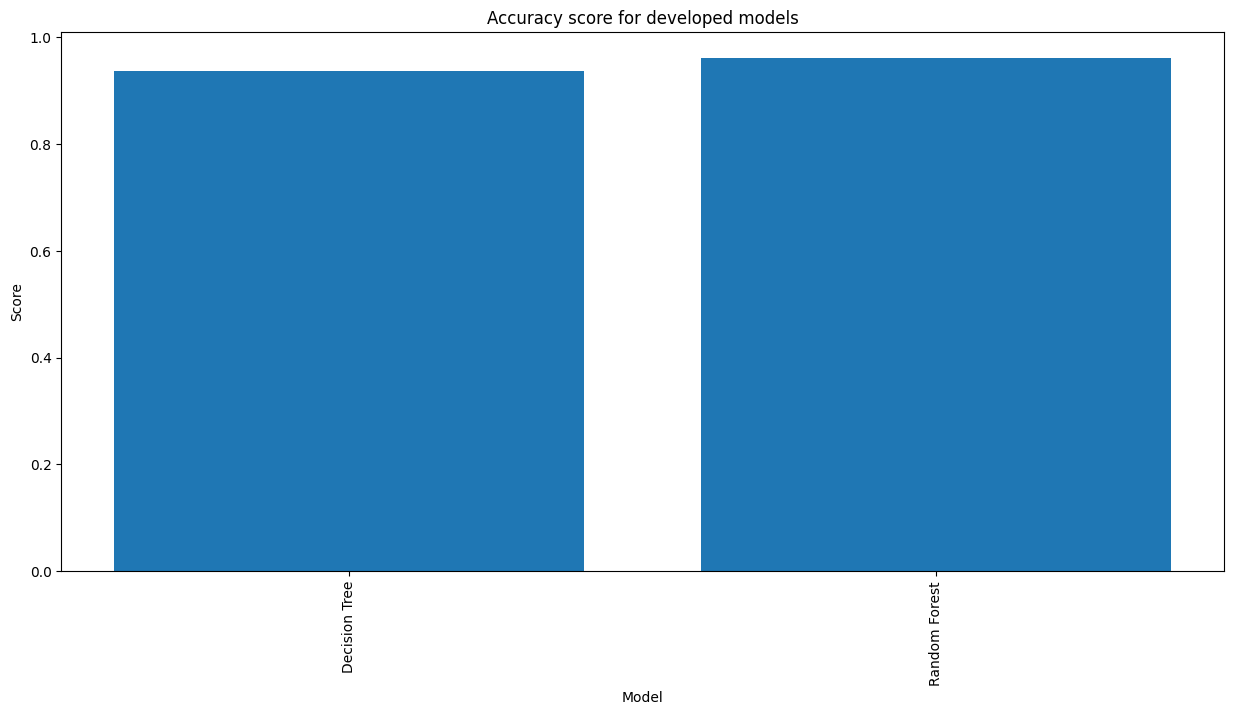

In [33]:
plt.figure(figsize=(15,7))
plt.title('Accuracy score for developed models')
plt.bar(models, accuracys,label='Accuracy')
plt.xticks(rotation=90)
plt.ylabel('Score')
plt.xlabel('Model')
plt.show()

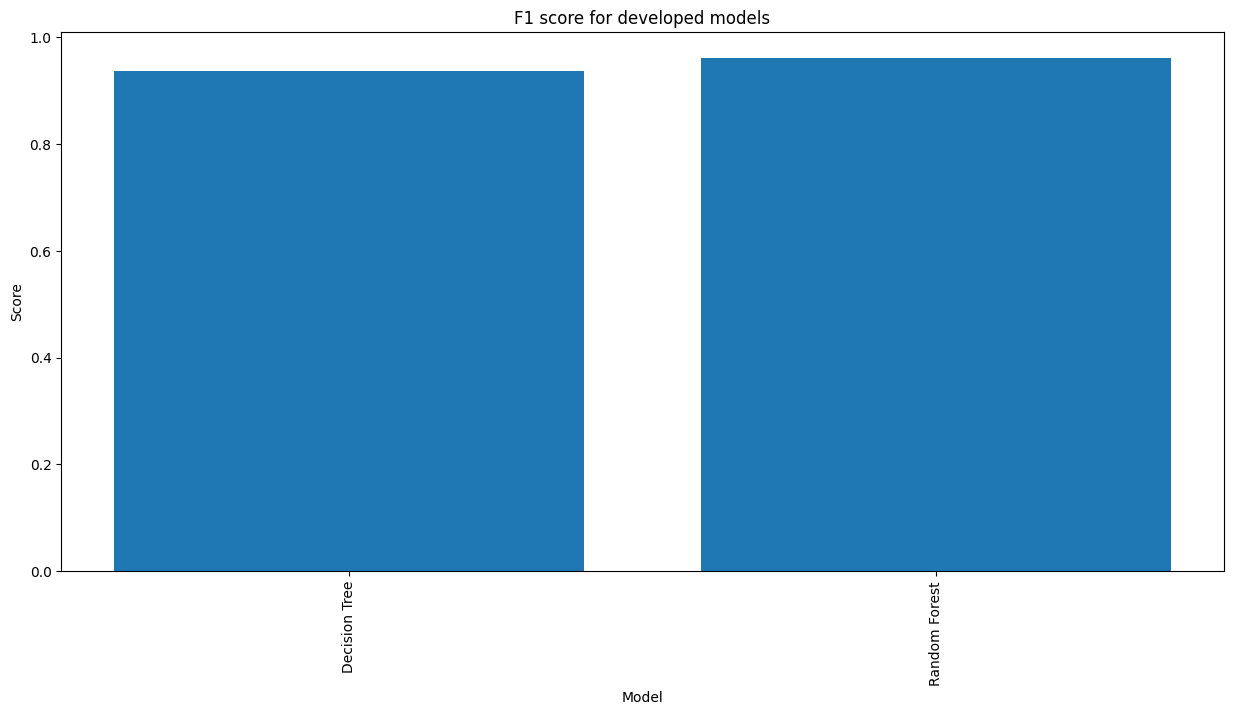

In [34]:
plt.figure(figsize=(15,7))
plt.title('F1 score for developed models')
plt.bar(models, f1s,label='F1')
plt.xticks(rotation=90)
plt.ylabel('Score')
plt.xlabel('Model')
plt.show()

(array([0.2, 1.2]),
 [Text(0.2, 0, 'Decision Tree'), Text(1.2, 0, 'Random Forest')])

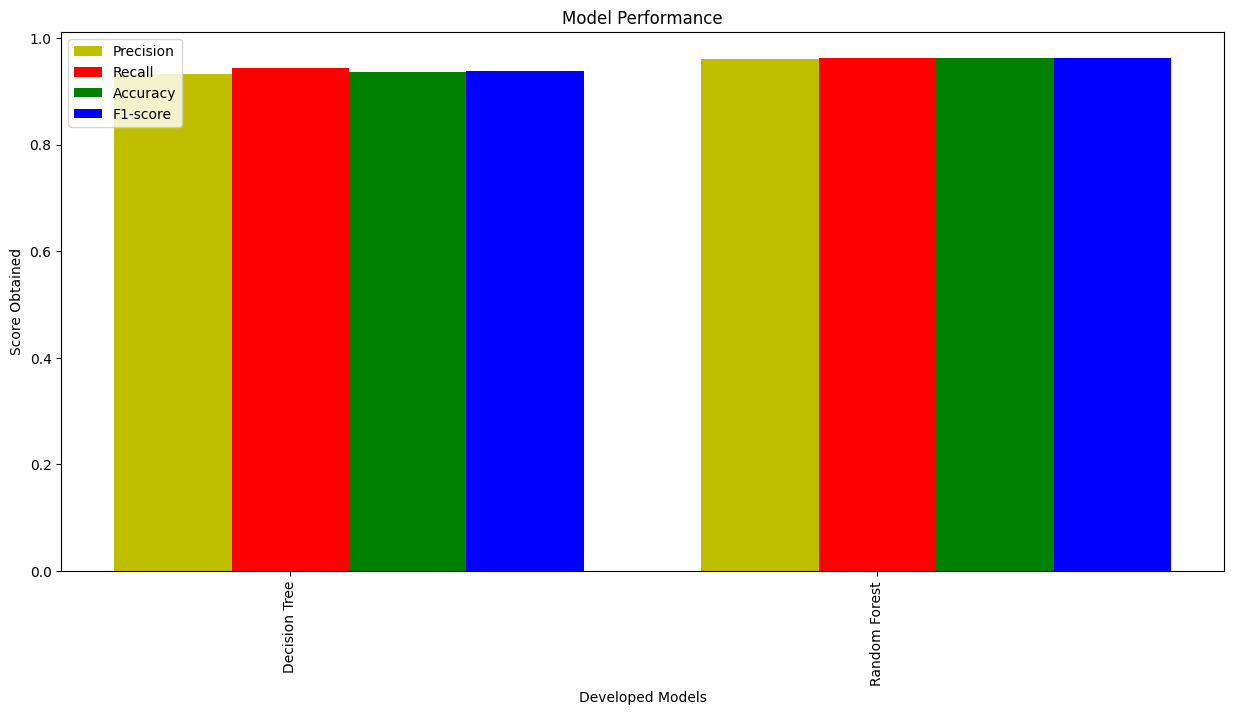

In [35]:
plt.figure(figsize=(15,7))
n=2
ind=np.arange(n)
width=0.2
bar1=plt.bar(ind,precisions,width,color='y')
bar2=plt.bar(ind+width,recalls,width,color='r')
bar3=plt.bar(ind+width*2,accuracys,width,color='g')
bar4=plt.bar(ind+width*3,f1s,width,color='b')
plt.xlabel('Developed Models')
plt.ylabel('Score Obtained')
plt.xticks(ind+width,['Decision Tree','Random Forest'])
plt.legend(('Precision','Recall','Accuracy','F1-score'),loc='upper left')
plt.title('Model Performance')
plt.xticks(rotation=90)

In [36]:
# import pickle
# with open('model.pkl', 'wb') as f:
#     pickle.dump(rf_model,f)


In [37]:
# test_data = df[['google_index', 'page_rank', 'nb_hyperlinks', 'web_traffic', 'nb_www', 'domain_age', 'longest_word_path', 'safe_anchor', 'ratio_extHyperlinks', 'phish_hints', 'ratio_digits_url', 'ratio_intHyperlinks', 'ratio_extRedirection', 'length_url', 'length_hostname', 'links_in_tags', 'length_words_raw', 'domain_in_title', 'char_repeat', 'avg_word_path']]
# import pickle
# load_model = pickle.load(open('model.pkl', 'rb'))
# load_model
# y_pred = load_model.predict(test_data)
# y_pred


